In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df['target_name'] = df.target.apply(lambda x : iris.target_names[x])

In [12]:
df[df.target == 0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [14]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [15]:
df0 = df[0:50]
df1 = df[50:100]
df2 = df[100:]

In [16]:
import matplotlib.pyplot as plt

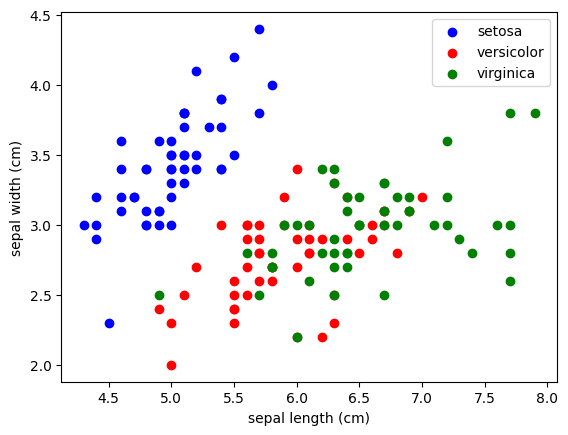

In [25]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='b')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='r')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='g')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.legend(['setosa', 'versicolor', 'virginica'])

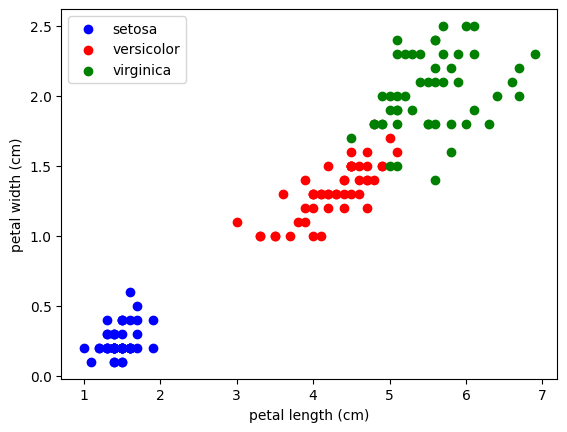

In [32]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='b')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='r')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='g')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.legend(['setosa', 'versicolor', 'virginica'])

# Train Test Split

In [34]:
X = df.drop(['target','target_name'], axis='columns')
y = df.target

In [30]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
len(X_train), len(X_test)

(120, 30)

# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
model = KNeighborsClassifier(n_neighbors=5)

In [59]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
model.score(X_test, y_test)

0.9333333333333333

Change n_neighbors value to see which value has best score

# Confusion Matirx

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0,  0],
       [ 0, 11,  1],
       [ 0,  1,  9]], dtype=int64)

In [63]:
import seaborn as sn

Text(50.722222222222214, 0.5, 'Truth')

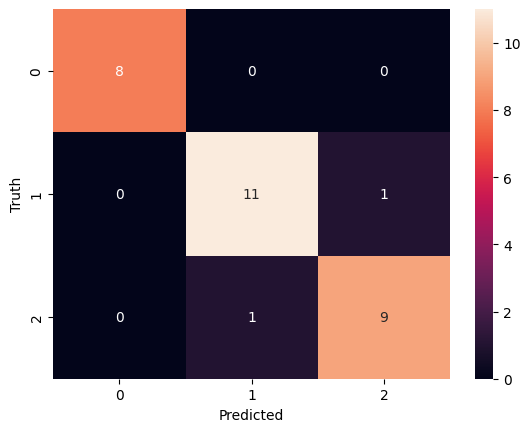

In [75]:
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

The diagonal values were no of samples rightly predicted
<br>1 at 2x3 location shows 1 prediction was incorrect (right answer was 1 but prediction made was 2)
<br>1 at 3x2 location shows 1 prediction was incorrect (right answer was 2 but prediction made was 1)

# Classification Report

In [76]:
from sklearn.metrics import classification_report

In [83]:
classification_report(y_pred, y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         8\n           1       0.92      0.92      0.92        12\n           2       0.90      0.90      0.90        10\n\n    accuracy                           0.93        30\n   macro avg       0.94      0.94      0.94        30\nweighted avg       0.93      0.93      0.93        30\n'

In [84]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      0.92      0.92        12
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

